# Math 425 Computation Linear Algebra
## HW3, Part B (Question 9)

### Brent A. Thorne

brentathorne@gmail.com

##### Linear transformations, plotting, and Python classes.

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

### 9.  Find the $ 3 \times 3$ matrices that produce the described composite 2D transformations, using homogeneous coordinates. Apply the transformations to the 'letter N' data, ``letterN.pny" and submit the corresponding plots as well.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

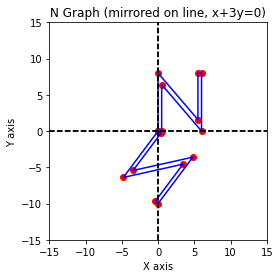

In [2]:
class letter:  # totally overkill
    """
    import numpy data and return letter object
    provides functions transform and plot
    assumes numpy data is 2-rows (2xm)
    recall: An m×n matrix has m rows and n columns.    
    """
    def __init__(self, filename):
        assert isinstance(filename, str)
        self.filename = filename
        self.T = sym.eye(3)  # consider feature to set transform on creation
        self.D = Matrix(np.load(filename))
        self.D = self.D.col_join(sym.ones(1,self.D.cols))
        
    def eye(self):
        self.T = sym.eye(3)
    
    def plot(self, title = 'Letter Plot'):
        lim=15 # consider feature to set limits based on origin and average points
        DD = self.T * self.D  # do inner product at plotting
        plt.title(f"{title}"); plt.xlabel("X axis"); plt.ylabel("Y axis")
        plt.scatter(list(DD.row(0)), list(DD.row(1)), color ="red")
        plt.plot(list(DD.row(0)), list(DD.row(1)), color ="blue")
        plt.xlim(-lim,lim); plt.ylim(-lim,lim)
        plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
        plt.axhline(0, color='black', linestyle='--')
        plt.axvline(0, color='black', linestyle='--')
                
    def show(self):
        plt.show()
        
    def __mul__(self, other): # dot the transform
        if isinstance(other, Matrix):
            self.T = other * self.T
        else:
            return NotImplemented
        
    def dot(self, other): # dot yourself
        return self.__mul__(other)
    
    def mirror(self, a,b,c): # mirror on line formed by f(a,b,c)= ax+by-c=0
        self.T = 1/(a**2+b**2)*Matrix([\
        [b**2-a**2,    -2*a*b, -2*a*c],\
        [   -2*a*b, a**2-b**2, -2*b*c],\
        [        0,         0, a**2+b**2]])
    
    def report(self): # so pretty
        display(Latex(f'$TD={sym.latex(self.T)}\
        {sym.latex(self.D.n(2))}$')) 
        display(Latex(f'$TD^*={sym.latex(Matrix(self.T*self.D).n(2))}\
        $ $^*TD$ rounded to two decimal points')) 

N = letter('letterN.npy')
#N.mirror(1,3,0) # mirror on line formed by f(a,b,c): ax+by-c==0
N.plot('N Graph (untransformed)')
N.mirror(1,3,0) # mirror on line formed by f(a,b,c): ax+by-c==0
N.plot(f'N Graph (mirrored on line, x+3y=0)')
display(Latex(f'$T={sym.latex(N.T)}$'))
N.report()
N.show()

#### (a) Translate by $(-2, 3)$, and then scale the $x$-coordinate by $0.8$ and the $y$-coordinate by $1.2$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

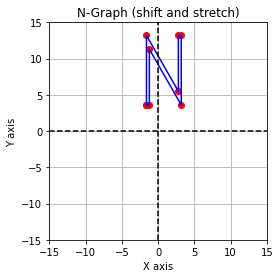

In [3]:
# see also: Ch2.7 P4E in Lay text
T1 = Matrix([[1,0,-2],[0,1,3],[0,0,1]])
T2 = Matrix([[0.8,0,0],[0,1.2,0],[0,0,1]])

N.eye() # clear transforms
N.dot(T1)
N.dot(T2)
N.plot('N-Graph (shift and stretch)')
display(Latex(f'$T={sym.latex(T2)}{sym.latex(T1)}={sym.latex(T2*T1)}$'))
N.report()

#### (b) Rotate points $\frac{\pi}{6}$, and then reflect through the $x$-axis.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

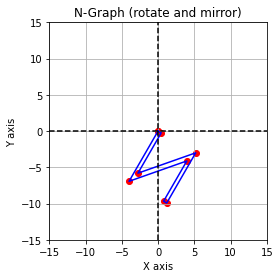

In [4]:
# use syms to make pretty
theta = sym.pi/6
T1 = Matrix([[sym.cos(theta), -sym.sin(theta),0],\
             [sym.sin(theta), sym.cos(theta),0],\
             [0,0,1]]) #rot
T2 = Matrix([[1,0,0],[0,-1,0],[0,0,1]]) # flip y

N.eye() # clear transforms
N.dot(T1) # stack on a transform
N.dot(T2) # and again
N.plot('N-Graph (rotate and mirror)')
display(Latex(f'$T={sym.latex(T2)}{sym.latex(T1)}={sym.latex(T2*T1)}$'))
N.report()

In [31]:
import cmath
N.eye()
#N.plot()
#N.show()
#N.report()
#N.T, N.D
z = (N.D.col(2)[0]+1j*N.D.col(2)[1])

C = 2*max(max(N.D.row(0)), max(N.D.row(1)))
R = C/(2*pi) # radius of sphere

r,theta = cmath.polar(z)
z,r,theta


### Appendix 0. The Matrix Alphabet
sym    |matrix| |sym    |matrix
------:|:-----|-|------:|:-----
A|Any Matrix|   |P|Permutation Matrix
B|Basis Matrix|   |P|Projection Matrix
C|Cofactor Matrix|   |Q|Orthogonal Matrix
D|Diagonal Matrix|   |R|Upper Triangular Matrix 
E|Elimination Matrix|   |R|Reduced Echelon Matrix
F|Fourier Matrix|   |S|Symmetric Matrix
H|Hadamard Matrix|   |T|Linear Transformation
I|Identity Matrix|   |U|Upper Triangular Matrix
J|Jordan Matrix|   |U|Left Singular Vectors
K|Stiffness Matrix|   |V|Right Singular Vectors 
L|Lower Triangular Matrix|   |X|Eigenvector Matrix
M|Markov Matrix|   |Λ|Eigenvalue Matrix
N|Nullspace Matrix|   |Σ|Singular Value Matrix

##### *Linear Algebra by Gilbert Strang